# New York City - East River Bicycle Crossings

## Daily bicycle counts for major bridges in NYC

- In this dataset, how many bicycles cross into and out of Manhattan per day?
- How strongly do weather conditions affect bike volumes?
- What is the top bridge in terms of bike load?

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import matplotlib.pyplot as plt
from matplotlib import pylab
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('nyc-east-river-bicycle-counts.csv')
data.head()

,Unnamed: 0,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0.47 (S),521.0,1067,1440.0,1307.0,4335
4,4,2016-04-05 00:00:00,2016-04-05 00:00:00,42.1,26.1,0,1416.0,2617,3081.0,2357.0,9471


In [3]:
data.columns

Index(['Unnamed: 0', 'Date', 'Day', 'High Temp (°F)', 'Low Temp (°F)',
       'Precipitation', 'Brooklyn Bridge', 'Manhattan Bridge',
       'Williamsburg Bridge', 'Queensboro Bridge', 'Total'],
      dtype='object')

In [4]:
data.shape

(210, 11)

In [5]:
data = data.drop('Unnamed: 0', axis = 1)

In [6]:
data = data.replace({'T':0.01, '0.47 (S)': '0.47'})
data = data.astype({"Precipitation": float})
data.isnull().values.any()
data.head()

,Date,Day,High Temp (°F),Low Temp (°F),Precipitation,Brooklyn Bridge,Manhattan Bridge,Williamsburg Bridge,Queensboro Bridge,Total
0,2016-04-01 00:00:00,2016-04-01 00:00:00,78.1,66.0,0.01,1704.0,3126,4115.0,2552.0,11497
1,2016-04-02 00:00:00,2016-04-02 00:00:00,55.0,48.9,0.15,827.0,1646,2565.0,1884.0,6922
2,2016-04-03 00:00:00,2016-04-03 00:00:00,39.9,34.0,0.09,526.0,1232,1695.0,1306.0,4759
3,2016-04-04 00:00:00,2016-04-04 00:00:00,44.1,33.1,0.47,521.0,1067,1440.0,1307.0,4335
4,2016-04-05 00:00:00,2016-04-05 00:00:00,42.1,26.1,0.00,1416.0,2617,3081.0,2357.0,9471


In [7]:
for i in range(len(data.columns[5:9])):
    avg = sum(data[data.columns[i+5]]) / len(data[data.columns[i+5]])
    print(data.columns[i+5] +" :  "+str(avg))

Brooklyn Bridge :  2269.633333333333
Manhattan Bridge :  4049.5333333333333
Williamsburg Bridge :  4862.466666666666
Queensboro Bridge :  3352.866666666667


<AxesSubplot:>

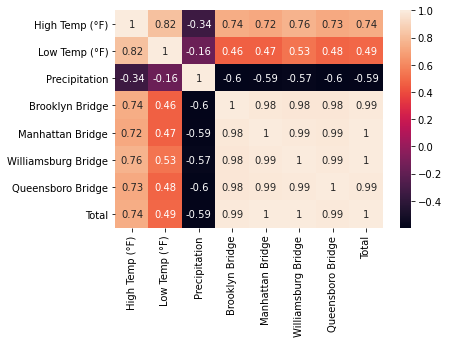

In [8]:
sns.heatmap(data.corr(),annot=True)

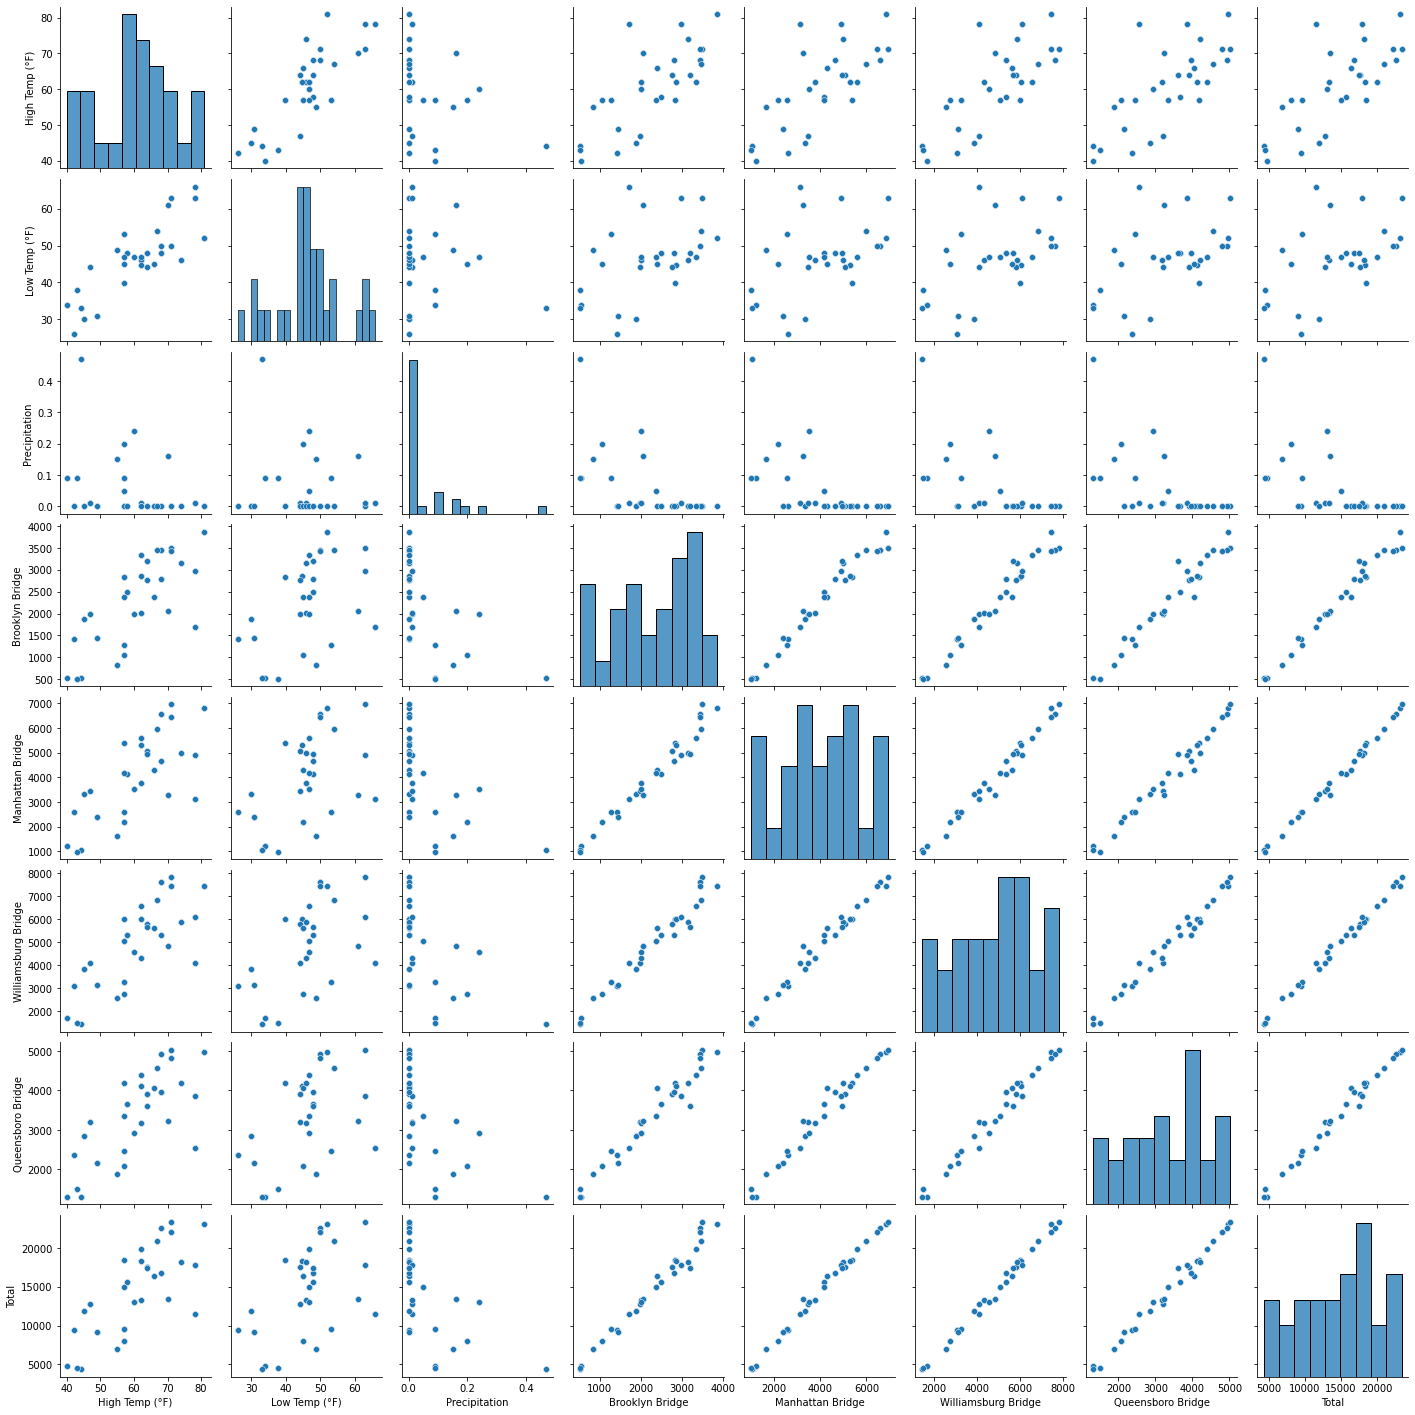

In [9]:
sns.pairplot(data)

<AxesSubplot:xlabel='Brooklyn Bridge', ylabel='High Temp (°F)'>

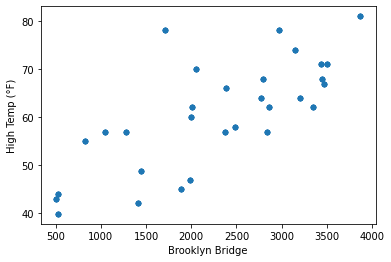

In [10]:
data.style.use('ggplot')
data.plot.scatter(x='Brooklyn Bridge', y='High Temp (°F)')

<AxesSubplot:xlabel='Brooklyn Bridge', ylabel='Low Temp (°F)'>

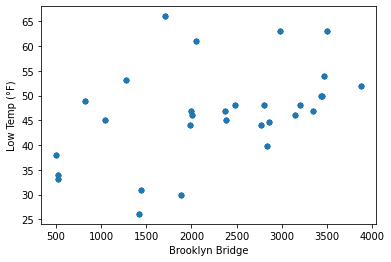

In [11]:
data.plot.scatter(x='Brooklyn Bridge', y='Low Temp (°F)')

## Linear Regression

In [12]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
X= np.array(data.drop(['Day','Date','Total','Brooklyn Bridge','Manhattan Bridge','Williamsburg Bridge','Queensboro Bridge'],1))
Y=np.array(data['Brooklyn Bridge'])

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [15]:
model = LinearRegression(normalize=True)
model.fit(X_train,Y_train)

LinearRegression(normalize=True)

In [16]:
model.intercept_

-830.3922888065426

In [17]:
pred = model.predict(X_test)
print(pred)

[2901.86441294 1520.03075681 2656.6294996  1564.38829379 3144.15603017
 1629.20390169 2774.72625106 3847.83032247 2185.73616157  -42.99490281
 3165.67229164 3256.51594661 1564.38829379 1520.03075681 2901.86441294
 1419.31099535 2536.16659112 3481.42866518 1734.97447488 2361.53796371
 2612.91394644 2774.72625106 1977.80118709  910.96904568 2176.48904176
 3144.15603017  -42.99490281 2176.48904176 1520.03075681 3481.42866518
 2698.8095143  2901.86441294 3144.15603017 2361.53796371 1520.03075681
 1564.38829379 1032.1787447  1419.31099535 1734.97447488 2774.72625106
 1420.32734231  -42.99490281 2185.73616157 2965.41201634  910.96904568
 2543.2671443  2543.2671443  1977.80118709 1977.80118709 3256.51594661
 2176.48904176 2965.41201634 2904.8495797  3144.15603017 1420.32734231
 2612.91394644 3481.42866518 1977.80118709 2656.6294996  1652.6430348
 2536.16659112 2904.8495797  1652.6430348 ]


In [18]:
model.score(X_test,Y_test)

0.7525993756159277

In [19]:
test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

In [20]:
def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)

In [21]:
print_evaluate(Y_train,train_pred)

MAE: 464.7623654060419
MSE: 301563.51667389396
RMSE: 549.1479915959759
R2 Square 0.6970252221841865


## Possion Regression

In [22]:
from sklearn.linear_model import PoissonRegressor

In [23]:
p_model = PoissonRegressor()

In [24]:
p_model.fit(X_train, Y_train)

PoissonRegressor()

In [25]:
p_pred = p_model.predict(X_test)

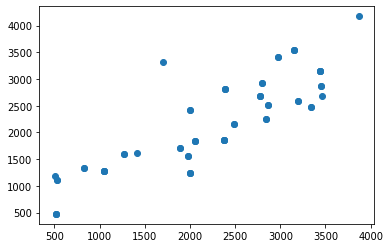

In [26]:
plt.scatter(Y_test,p_pred)

<AxesSubplot:xlabel='Precipitation', ylabel='Manhattan Bridge'>

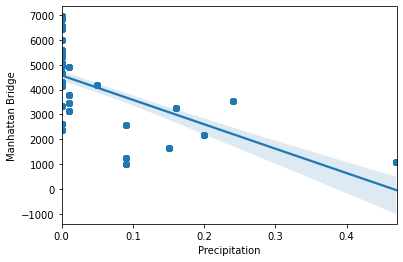

In [27]:
sns.regplot(x='Precipitation', y='Manhattan Bridge', data=data)

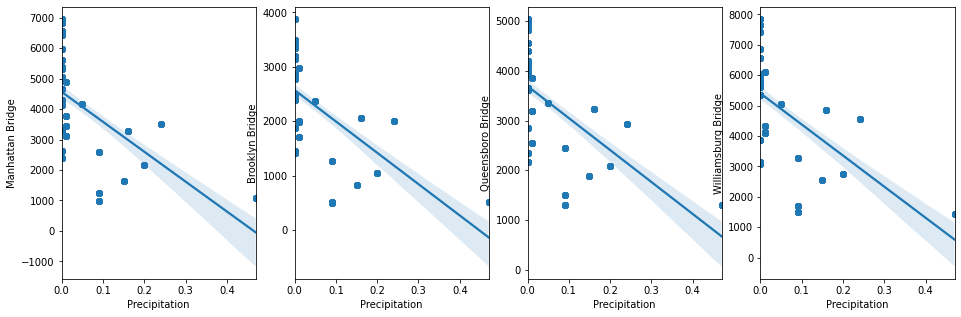

In [28]:
fig, axs = plt.subplots(ncols=4)
sns.regplot(x='Precipitation', y='Manhattan Bridge', data=data,ax=axs[0])
sns.regplot(x='Precipitation', y='Brooklyn Bridge', data=data,ax=axs[1])
sns.regplot(x='Precipitation', y='Queensboro Bridge', data=data,ax=axs[2])
sns.regplot(x='Precipitation', y='Williamsburg Bridge', data=data,ax=axs[3])
fig.set_size_inches(16, 5)

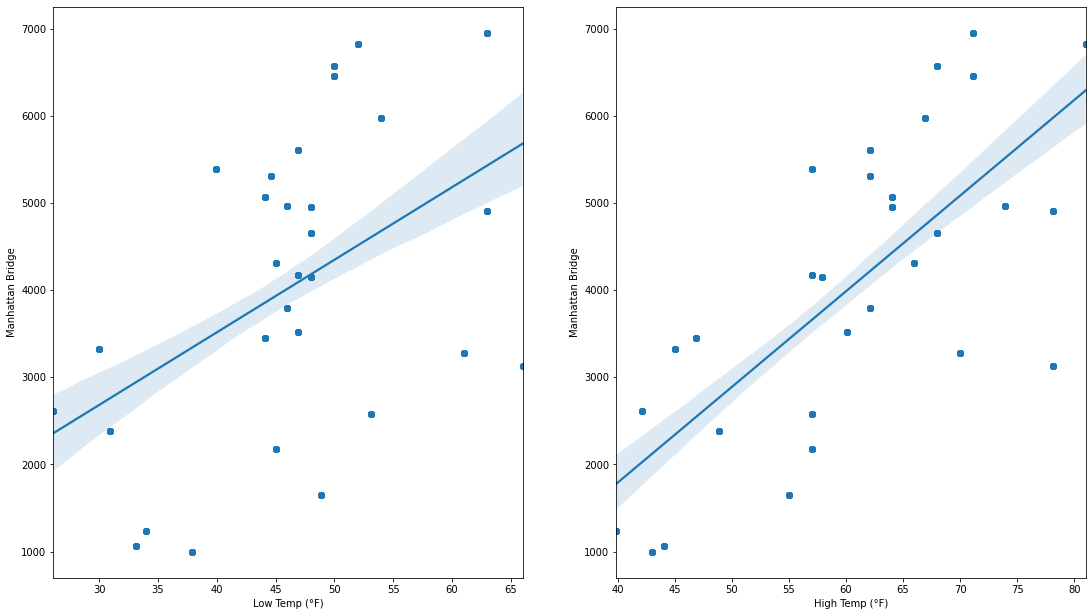

In [29]:
fig, axs = plt.subplots(ncols=2)
sns.regplot(x='Low Temp (°F)', y='Manhattan Bridge', data=data, ax=axs[0])
sns.regplot(x='High Temp (°F)', y='Manhattan Bridge', data=data, ax=axs[1])
fig.set_size_inches(18.5, 10.5)

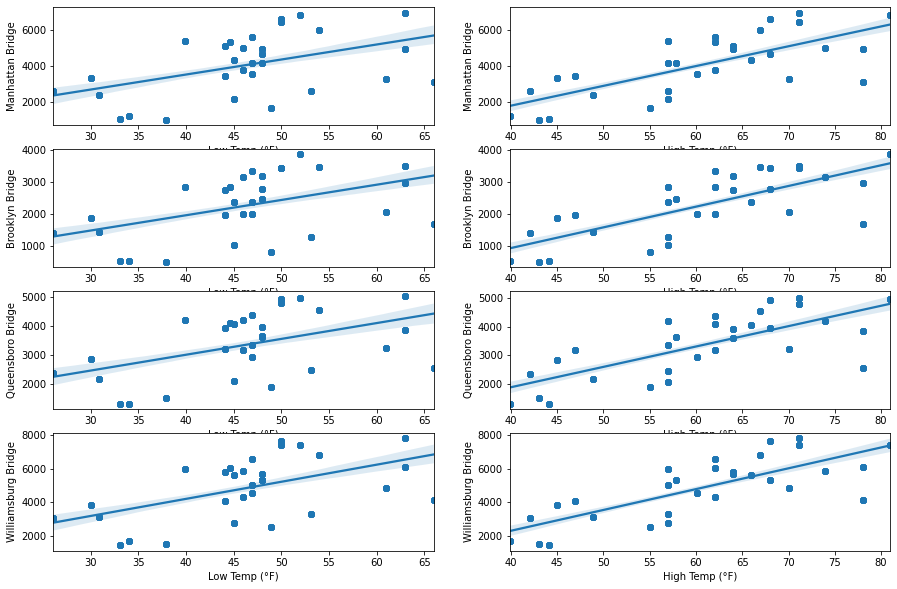

In [30]:
fig, axs = plt.subplots(nrows=4, ncols=2)
sns.regplot(x='Low Temp (°F)', y='Manhattan Bridge', data=data, ax=axs[0,0])
sns.regplot(x='High Temp (°F)', y='Manhattan Bridge', data=data, ax=axs[0,1])
sns.regplot(x='Low Temp (°F)', y='Brooklyn Bridge', data=data, ax=axs[1,0])
sns.regplot(x='High Temp (°F)', y='Brooklyn Bridge', data=data, ax=axs[1,1])
sns.regplot(x='Low Temp (°F)', y='Queensboro Bridge', data=data, ax=axs[2,0])
sns.regplot(x='High Temp (°F)', y='Queensboro Bridge', data=data, ax=axs[2,1])
sns.regplot(x='Low Temp (°F)', y='Williamsburg Bridge', data=data, ax=axs[3,0])
sns.regplot(x='High Temp (°F)', y='Williamsburg Bridge', data=data, ax=axs[3,1])
fig.set_size_inches(15, 10)

Relationship between weather and bicycle
- In Manhattan Bridge, the average volume of bike is 4049.5333333333333.
- The Top briges in terms of bike road is Williamsburg Bridge
- There are more volumns of bike if the temperature is high. 
- People tend to go out to take bicycle during warm weather.
- The volume of bike significantly decrease when the precipitation rate increase. 